<a href="https://colab.research.google.com/github/GouthamVicky/LLM-LongDoc-Summary/blob/main/InferenceComparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U trl transformers accelerate git+https://github.com/huggingface/peft.git
!pip install -q datasets bitsandbytes einops wandb
!pip install vllm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134

In [ ]:
!pip install psutil
!pip install GPUtil

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7395 sha256=0d60d7cb3b21e1b2bd4943b3db63f0d67d75ca5e9749026c41b01a71fe3ea413
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil


In [ ]:
import subprocess

def get_gpu_memory_usage():
    result = subprocess.check_output(['nvidia-smi', '--query-gpu=memory.used', '--format=csv,nounits,noheader'])
    gpu_memory = [int(x) for x in result.decode('utf-8').strip().split('\n')]
    return gpu_memory

gpu_memory_usage = get_gpu_memory_usage()
print("GPU Memory Usage (MB):", gpu_memory_usage)

GPU Memory Usage (MB): [0]


In [ ]:
import psutil

def get_ram_memory_usage():
    virtual_memory = psutil.virtual_memory()
    return virtual_memory.percent

ram_memory_usage = get_ram_memory_usage()
print("RAM Memory Usage (%):", ram_memory_usage)


RAM Memory Usage (%): 2.3


In [ ]:
sample_summary_prompt="""### Please give me a brief summary of this research paper
### Paper : shown to be spatially coincident with the sn in pre sn images with roughly two dozen upper limits derived from non detections  .
this review is organized as follows .
following a brief summary of sn classification and stellar evolution theory 2 one example from each of the following three categories of progenitor studies is provided 3 ordered from most to least common 1 no progenitor star detected in pre sn images 2 likely progenitor star identified via spatial coincidence in pre sn and post sn images 3 progenitor star detected in pre sn images and subsequently confirmed by demonstrating its absence in images taken after the sn has faded beyond detection .
 see also the article by elias rosa in this volume and sn progenitor forensics e.g.
for a comprehensive discussion of all such related areas see the recent review by  .
ii p are the least stripped at the time of explosion and ib c are the most stripped .
among the most complete and accessiblestars .
comparison with other contemporary model grids e.g.
to illustrate the analysis process in such a situation i consider sn 2006my an sn ii p that exploded in a galaxy  mpc away nearly all sne with progenitor studies are within  mpc since source confusion becomes an increasing problem with distance .
we next set an band detection limit in the pre sn frame by placing artificial stars of progressively fainter magnitude at the sn location and letting the photometry software in this case hstphot see  attempt to detect them .
upon adopting the most conservative values for each of the parameters i.e.
the ones that produce the least restrictive  for the progenitor s upper luminosity limit and allowing for a maximum systematic uncertainty of 0.2 dex in the theoretical stellar model endpoints see 2 the limiting bolometric magnitude above which any rsg would have been detected in our pre sn image  is derived .
we then compared this with the final luminosity of stars with  predicted by the stars stellar evolution models figure 2c to derive an upper bound on the progenitor mass of  .
as we shall see 4 it is the sheer number of such progenitor non detections that permits rather strong conclusions to be drawn about cc sn progenitors from this category of progenitor studies .
an unresolved stellar cluster or association of several massive stars with only part of the light coming from the actual progenitor of sn 2005gl  .
this observation demonstrates that the luminous source in the pre sn image has indeed disappeared figure 4c which implies that the progenitor of sn 2005gl was a single extremely luminous star that exploded while in the lbv phase  .
in addition to exploding during an unexpected evolutionary phase the very fact that such a massive star is demonstrated to have exploded at all as opposed to directly collapsing to a black hole with no sn explosion is important since the optical signature produced at the time of stellar collapse to a black hole is at present virtually unconstrained by either observation or theory see e.g.
and references therein .
i now briefly summarize results to date arising from direct progenitor searches in pre sn images for a more comprehensive review see  .
a summary of the current state of affairs of cc sn progenitor research via studies of pre sn images is provided by figure 6 .

### Summary :"""

## Downloading Tokenzier of Finetuned model


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch

model = "GouthamVignesh/falcon-arxiv-long-summary-1B"

tokenizer = AutoTokenizer.from_pretrained(model)

## Initiating the Huggingface pipeline

In [ ]:
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

In [ ]:
# results = " ".join([f"{seq['generated_text']}" for seq in pipeline(sample_summary_prompt, max_length=1024, do_sample=True, top_k=10, num_return_sequences=1, eos_token_id=tokenizer.eos_token_id)])
# generated_summary=results.split("### Summary :")[-1]
# print(generated_summary)

import time

# Your code for generating the summary
start_time = time.time()

results = " ".join([f"{seq['generated_text']}" for seq in pipeline(sample_summary_prompt, max_length=1024, do_sample=True, top_k=10, num_return_sequences=1, eos_token_id=tokenizer.eos_token_id)])

end_time = time.time()
elapsed_time = end_time - start_time

generated_summary = results.split("### Summary :")[-1]

# Calculate the number of tokens in the generated summary
generated_tokens = len(tokenizer.encode(generated_summary, add_special_tokens=True))

# Print the generated summary and timing information
timetaken_hf_pipeline = f"{elapsed_time:.2f} seconds"
token_generated_per_second_hf_pipeline = f"{generated_tokens / elapsed_time:.2f} tokens/second"
gpu_memory_hf_pipeline = get_gpu_memory_usage()

# Print the generated summary and variable values
print("Generated Summary:")
print(generated_summary)
print(f"Total Time Taken: {timetaken_hf_pipeline}")
print(f"Tokens Generated: {generated_tokens}")
print(f"Tokens Generated Per Second: {token_generated_per_second_hf_pipeline}")
print(f"GPU Memory Usage (MB): {gpu_memory_hf_pipeline}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Summary:

1 we found that the pre sn images of sn 2005gl have a high probability of containing progenitor stars.
and we found that a significant portion of sn 2005gl progenitors have been discovered in pre sn images.
this is the case for sn i and ii.
2 in addition to being in the vicinity of the pre sn image the sn progenitors are spatially coincident with a region in this image where they appear to be spatially correlated with a nearby region of very high star count.
3 in addition a portion of the pre sn image appears to have been taken before the sn image was formed.
4 as mentioned above the progenitor mass of sn 2005gl has been derived using a method of analysis which allows for significant uncertainty regarding the stellar evolution models that the sn progenitors are assumed to be derived in this manner see .
5 in particular the sn progenitors are assumed to have evolved in a way that they remain detectable as cc sn stars even when they have faded beyond detection in the 

In [ ]:
import gc
import torch

#del pipeline
gc.collect()



# Clean up GPU memory
torch.cuda.empty_cache()

## Vllm Testing

In [ ]:
from vllm import LLM, SamplingParams

sampling_params = SamplingParams(temperature=0.8,max_tokens=1024,top_p=0.1, top_k=10)


llm = LLM(model="GouthamVignesh/falcon-long-summary-ckpt",trust_remote_code=True,gpu_memory_utilization=0.90) #Default value 0.95
#llm = LLM(model="tiiuae/falcon-rw-1b",trust_remote_code=True)


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-rw-1b:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


INFO 11-08 04:27:09 llm_engine.py:72] Initializing an LLM engine with config: model='GouthamVignesh/falcon-long-summary-ckpt', tokenizer='GouthamVignesh/falcon-long-summary-ckpt', tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=auto, tensor_parallel_size=1, quantization=None, seed=0)


INFO 11-08 04:27:33 llm_engine.py:207] # GPU blocks: 10177, # CPU blocks: 1365


In [ ]:
import time

# Record the start time
start_time = time.time()

outputs = llm.generate([sample_summary_prompt], sampling_params)

# Record the end time
end_time = time.time()

# Calculate the number of tokens generated
total_generated_tokens = 0

for output in outputs:
    generated_text = output.outputs[0].text
    total_generated_tokens += len(tokenizer.encode(generated_text, add_special_tokens=True))

# Record GPU memory usage after generating text
final_gpu_memory = get_gpu_memory_usage()

# Calculate the time taken for this code
elapsed_time = end_time - start_time

# Calculate the difference in GPU memory utilization between HF pipelinen and using VLLM
gpu_memory_difference = final_gpu_memory[0] - gpu_memory_hf_pipeline[0]

# Print the results
print("\n")
print(f"Total Time Taken: {elapsed_time:.2f} seconds")
print(f"Tokens Generated: {total_generated_tokens}")
print(f"Tokens Generated Per Second: {total_generated_tokens / elapsed_time:.2f} tokens/second")
print(f"GPU Memory Usage Difference: {gpu_memory_difference} MB")


Processed prompts: 100%|██████████| 1/1 [00:15<00:00, 15.20s/it]



Total Time Taken: 15.21 seconds
Tokens Generated: 1024
Tokens Generated Per Second: 67.34 tokens/second
GPU Memory Usage Difference: 33140 MB


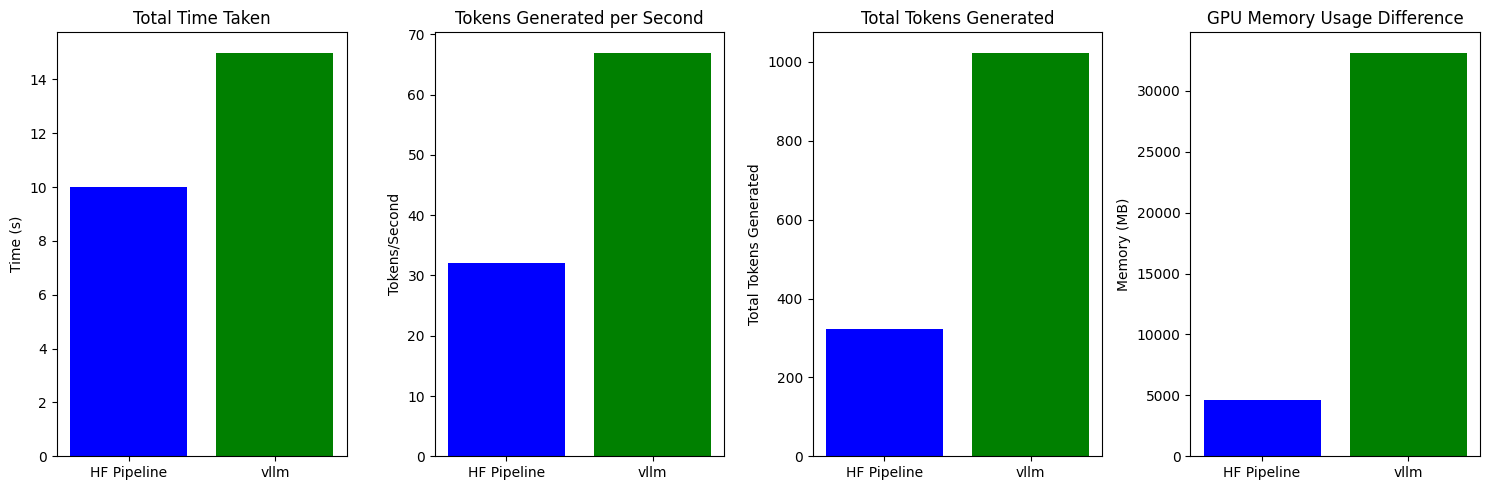

In [ ]:
import matplotlib.pyplot as plt

# Create lists for each metric
timetaken_metrics = ["HF Pipeline", "vllm"]
timetaken_hf_pipeline_seconds = int(float(timetaken_hf_pipeline.split()[0]))
elapsed_time_seconds = int(float(str(elapsed_time).split()[0]))
timetaken_values = [timetaken_hf_pipeline_seconds, elapsed_time_seconds]

token_per_second_metrics = ["HF Pipeline", "vllm"]
token_per_second_values = [32, 67]

gpu_memory_metrics = ["HF Pipeline", "vllm"]
gpu_memory_values = [gpu_memory_hf_pipeline, gpu_memory_difference]

# Total tokens generated in both cases
total_tokens_metrics = ["HF Pipeline", "vllm"]
total_tokens_values = [generated_tokens, total_generated_tokens]

# Create subplots for each metric
plt.figure(figsize=(15, 5))  # Increase the figure size

# Plot for time taken
plt.subplot(141)  # Four subplots in a single row
plt.bar(timetaken_metrics, timetaken_values, color=['blue', 'green'])
plt.ylabel('Time (s)')
plt.title('Total Time Taken')

# Plot for tokens generated per second
plt.subplot(142)  # Four subplots in a single row
plt.bar(token_per_second_metrics, token_per_second_values, color=['blue', 'green'])
plt.ylabel('Tokens/Second')
plt.title('Tokens Generated per Second')

# Plot for total tokens generated
plt.subplot(143)  # Four subplots in a single row
plt.bar(total_tokens_metrics, total_tokens_values, color=['blue', 'green'])
plt.ylabel('Total Tokens Generated')
plt.title('Total Tokens Generated')

# Plot for GPU memory usage difference
plt.subplot(144)  # Four subplots in a single row
plt.bar(gpu_memory_metrics, gpu_memory_values, color=['blue', 'green'])
plt.ylabel('Memory (MB)')
plt.title('GPU Memory Usage Difference')

plt.tight_layout()
plt.show()
